# Stroke Data Exploratory Data Analysis

In [1]:
#Import 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
#cleaned data dropped missing BMI values

stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv_cleaned.csv')

In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


In [4]:
# rename columns

stroke_data.rename(columns = {'Residence_type':'residence_type'}, inplace = True)

In [5]:
#define target variable
stroke_data['target'] = stroke_data.stroke

#remove stroke column
stroke_data = stroke_data.drop(['stroke'], axis =1)

In [6]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Select Numerical Features

In [7]:
#select numerical features
features_num = ['age', 'avg_glucose_level', 'bmi']

In [8]:
#basic stats
stroke_data[features_num].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
10%,10.000000,65.626000,19.700000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
90%,74.000000,187.004000,38.900000
max,82.000000,271.740000,97.600000


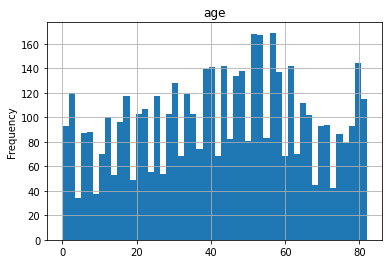

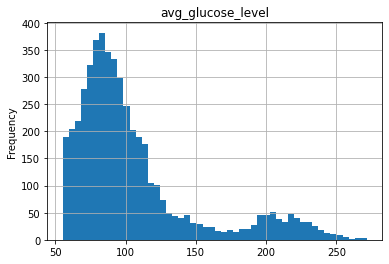

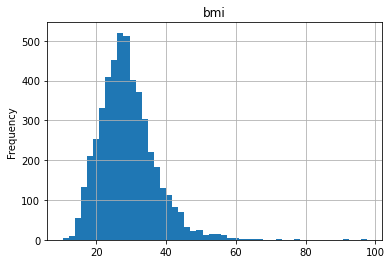

In [9]:
#plot distribution of numerical features
for i in features_num:
    stroke_data[i].plot(kind ='hist', bins =50)
    plt.title(i)
    plt.grid()
    plt.show()

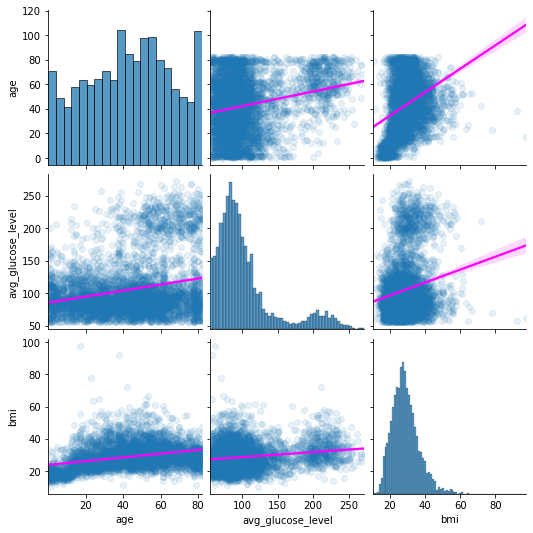

In [10]:
#pairwise scatter plot
sns.pairplot(stroke_data[features_num],
            kind='reg', plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

## Select Categorical Features

In [11]:
features_cat=['gender','hypertension','heart_disease','ever_married',
                'work_type','residence_type','smoking_status']

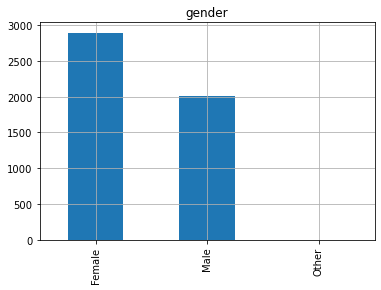

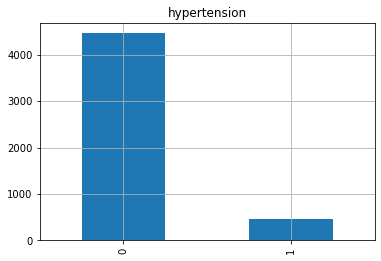

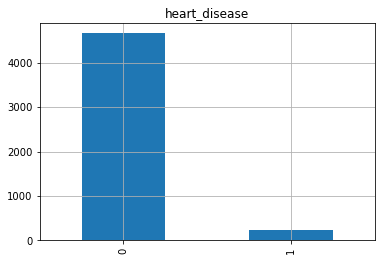

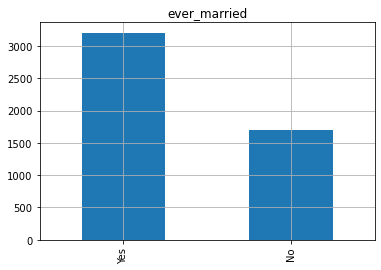

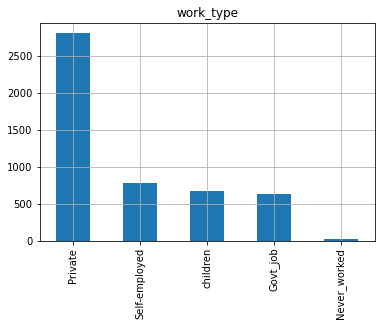

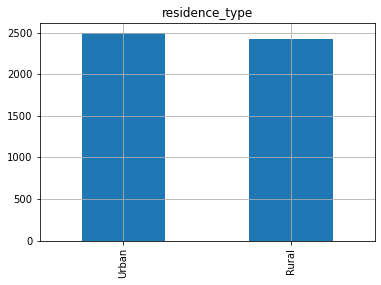

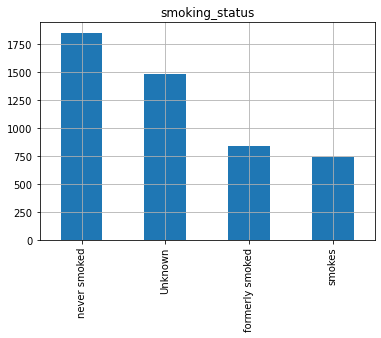

In [12]:
for i in features_cat:
    stroke_data[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.grid()
    plt.show()

## Target

In [13]:
#calc frequencies
target_count = stroke_data.target.value_counts()
print(target_count)
print()
print('Percentage of strokes [1]:', np.round(100*target_count[1]/target_count.sum(),2), '%')

0    4700
1     209
Name: target, dtype: int64

Percentage of strokes [1]: 4.26 %


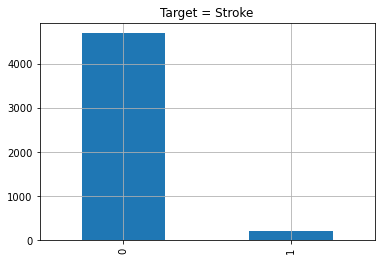

In [14]:
#plot target distribution
target_count.plot(kind ='bar')
plt.title('Target = Stroke')
plt.grid()
plt.show()

<AxesSubplot:>

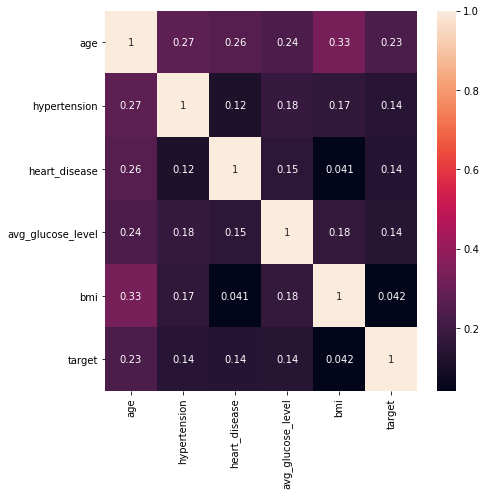

In [34]:
#plot heatmap

#heat map
plt.figure(figsize=(7,7))
sns.heatmap(stroke_data[['age', 'hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'target']].corr(), annot=True)

Age has highest positive correlation with stroke (target)

C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

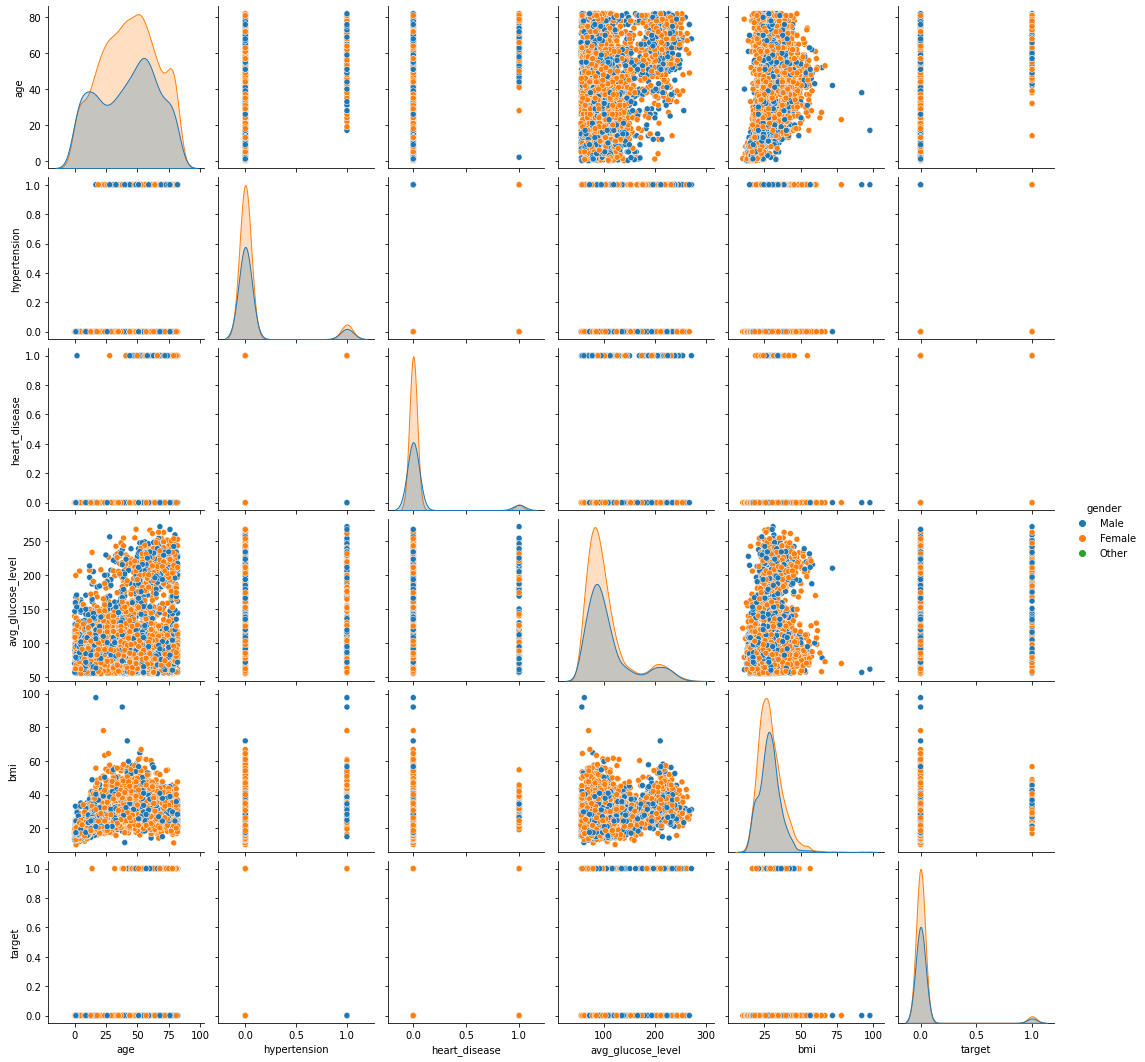

In [54]:
sns.pairplot(stroke_data[['gender','age', 'hypertension','heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'target']], hue= 'gender')

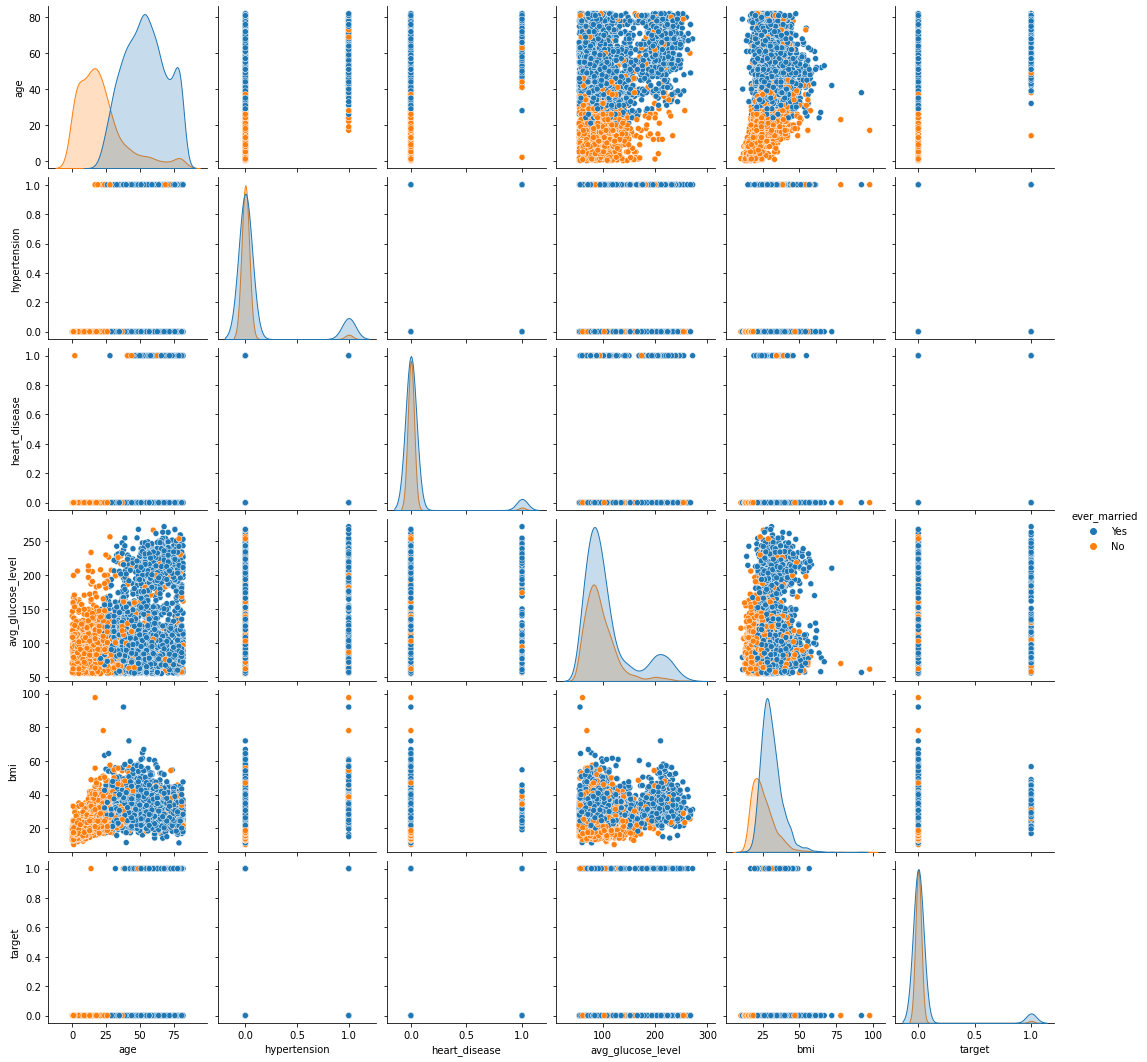

In [55]:
sns.pairplot(stroke_data[['gender','age', 'hypertension','heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'target']], hue= 'ever_married')

C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Myngoc\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


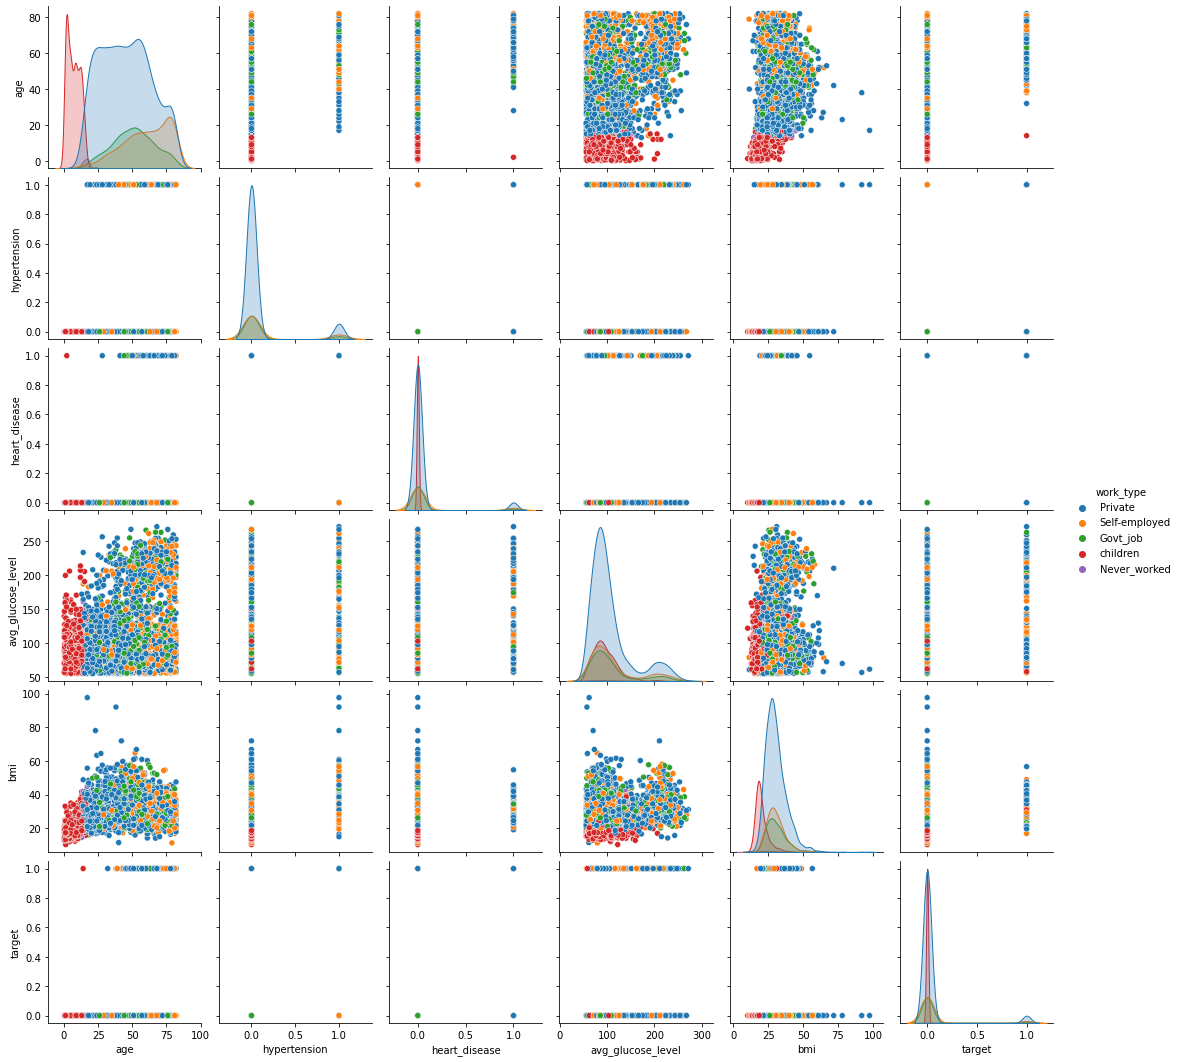

In [56]:
sns.pairplot(stroke_data[['gender','age', 'hypertension','heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'target']], hue= 'work_type')

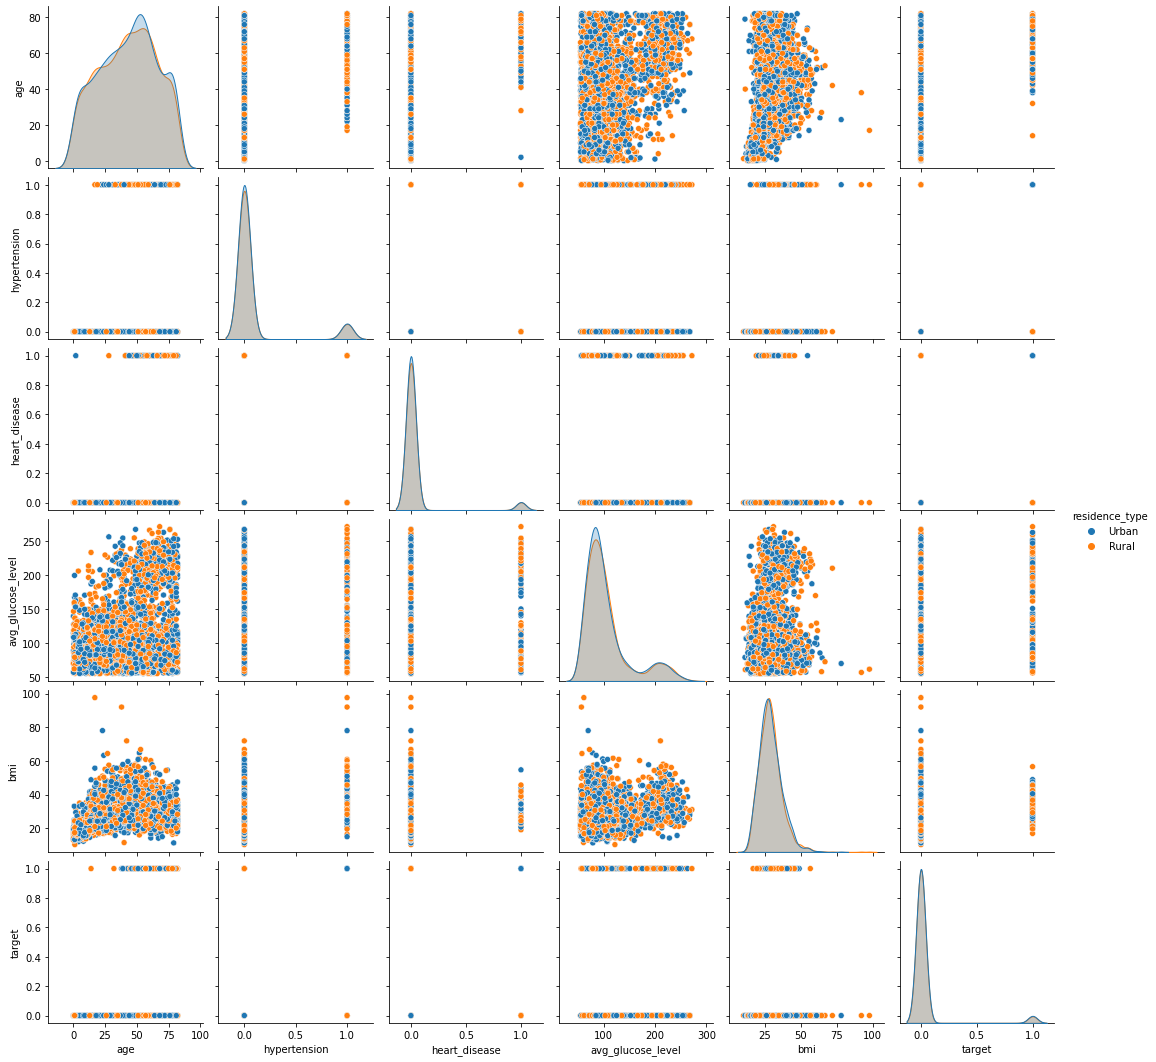

In [57]:
sns.pairplot(stroke_data[['gender','age', 'hypertension','heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'target']], hue= 'residence_type')

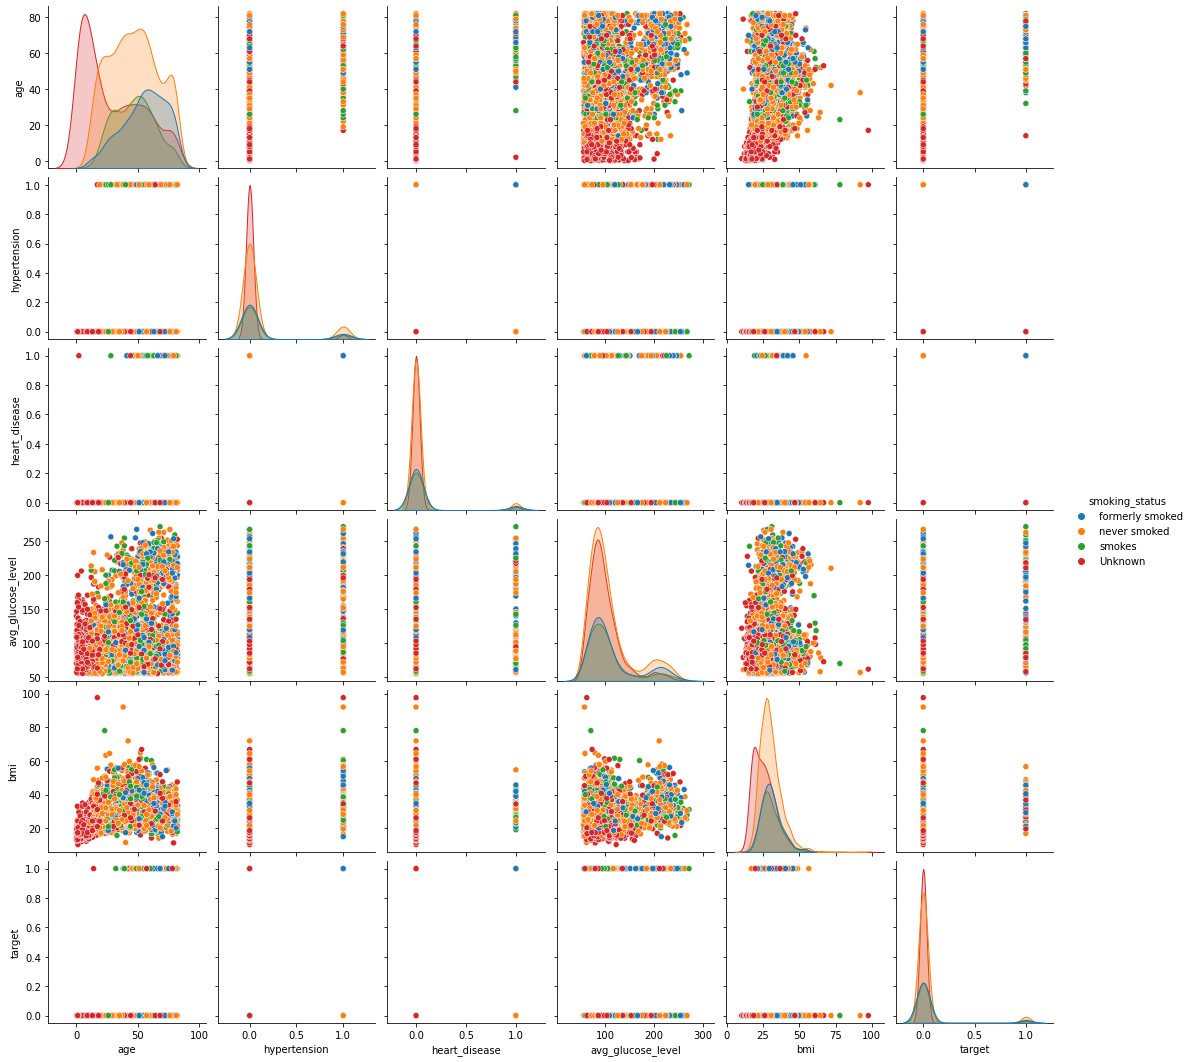

In [58]:
sns.pairplot(stroke_data[['gender','age', 'hypertension','heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'target']], hue= 'smoking_status')